In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [3]:
train_labels.shape

(404,)

In [4]:
test_data[0]

array([ 18.0846,   0.    ,  18.1   ,   0.    ,   0.679 ,   6.434 ,
       100.    ,   1.8347,  24.    , 666.    ,  20.2   ,  27.25  ,
        29.05  ])

In [5]:
# train_data[0]

# # array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
# #         91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
# #         18.72   ])

In [6]:
# train_data_mean

# # array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
#        5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
#        9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
#        1.27408168e+01])

In [7]:
# train_data_std

# # array([9.22929073e+00, 2.37382770e+01, 6.80287253e+00, 2.40939633e-01,
#        1.17147847e-01, 7.08908627e-01, 2.79060634e+01, 2.02770050e+00,
#        8.68758849e+00, 1.66168506e+02, 2.19765689e+00, 9.39946015e+01,
#        7.24556085e+00])

In [8]:
# train_data - train_data_mean

In [9]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.

train_data_mean = train_data.mean(axis=0) 
train_data_std = train_data.std(axis=0)
train_data = train_data - train_data_mean

        
# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
train_data = train_data/train_data_std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data_mean = test_data.mean(axis=0) 
test_data_std = test_data.std(axis=0)
test_data = test_data - test_data_mean
test_data = test_data/test_data_std

In [10]:
train_data.shape[1]

13

모델 구성 및 컴파일

In [11]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델은 loss와 metrics를 mse로 사용합니다.
# [[YOUR CODE]]


model = models.Sequential()
model.add(layers.Input(shape=13,))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(10, activation='softmax'))
model.compile(loss='mse', metrics = ['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
Total params: 5,056
Trainable params: 5,056
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(train_data, train_labels, epochs=500, batch_size=16, validation_data=(test_data, test_labels))

Epoch 1/500
26/26 [==============================] - 1s 7ms/step - loss: 568.7686 - mae: 21.9975 - val_loss: 583.3625 - val_mae: 22.3575
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 537.7945 - mae: 21.3061 - val_loss: 544.8287 - val_mae: 21.5017
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 495.8522 - mae: 20.3458 - val_loss: 497.1448 - val_mae: 20.4024
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 445.0664 - mae: 19.1279 - val_loss: 440.5308 - val_mae: 19.0383
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 388.5557 - mae: 17.6907 - val_loss: 379.4780 - val_mae: 17.4819
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 327.4751 - mae: 16.0149 - val_loss: 316.8747 - val_mae: 15.7673
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 267.7076 - mae: 14.2321 - val_loss: 256.5204 - val_mae: 13.9818
Epoch 8/500
26/26 [======================

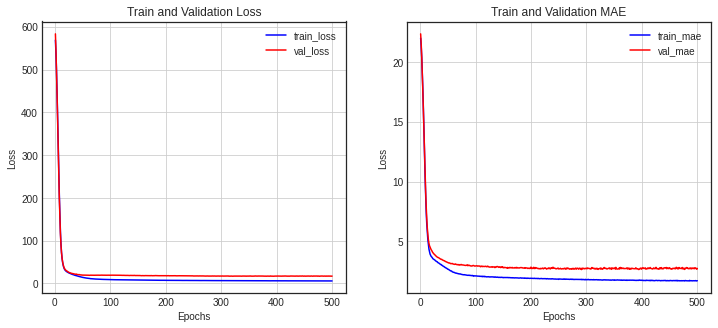

In [13]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.grid()
ax2.legend()

plt.show()

In [14]:
model.evaluate(test_data, test_labels)

# loss: 16.3494 - mae: 2.4722 옵티마이저 설정없음 batch_size=4
# loss: 16.8409 - mae: 2.7009 optimizer='adam' batch_size=4
# loss: 17.0557 - mae: 2.6159 옵티마이저 설정없음 batch_size=4
# loss: 17.0971 - mae: 2.6810 옵티마이저 설정없음 batch_size=32
# loss: 17.1404 - mae: 2.7336 옵티마이저 설정없음 batch_size=16
# loss: 17.2247 - mae: 2.7108 옵티마이저 설정없음 epochs=500, batch_size=16
# loss: 18.4122 - mae: 2.7153 optimizer='rmsprop' batch_size=4
# loss: 18.1140 - mae: 2.8198 optimizer='rmsprop' batch_size=32
# loss: 19.3903 - mae: 2.7993 옵티마이저 설정없음 batch_size=32
# loss: 20.0950 - mae: 3.0412 optimizer='adam' batch_size=32
# loss: 21.0823 - mae: 3.3321 옵티마이저 설정없음 batch_size=128
# loss: 26.8171 - mae: 3.0479 optimizer='adam' batch_size=2
# 레이어 추가 loss: 62.6193 - mae: 4.3065
# 레이어 추가 loss: 33.4409 - mae: 3.5778 에폭 1000

4/4 [==============================] - 0s 2ms/step - loss: 17.1404 - mae: 2.7336


[17.140398025512695, 2.733560085296631]

## 회고

1) 데이터가 어떤 모습인지 제대로 파악되지 않은 상태에서 모델만 돌려보려니.. 감이 잘 안오지 않았다.. ㅠ 맹목적으로 따라가는 느낌이었다.

2) 실제 예제를 따라갈때야 윤곽이 잡힌다. 데이터 로드, 확인, 전처리, 모델 구성, 학습, 평가의 과정이.. 조금씩 눈에 들어온다. 펀드에서도 전체적인 부분을 항상? 보여주고, 어느 부분을 집중적으로 보고 있는지 시각화해준다면.. 조금 더 눈에 들어오지 않을까 싶다.

3) train_data = train_data - train_data_mean
이 코드가 충격적이었다. 각 데이터값에서 어떻게 평균값을 뺄지 고민했는데... 아주 단순한 방법이..
처음에는 train_data와 똑같은 shape의 mean 값을 만들어서 빼줘야하나 싶었다. 아니라서 다행.

4) 회귀 모델에 # model.add(layers.Dense(10, activation='softmax'))를 적용하면, 그래프가 아주 잘못 나온다. softmax는 분류모델에만 쓰는 걸로 해야겠다.

5) 레이어와 옵티마이저, 배치사이즈를 어떻게 조정하느냐에 따라 결과값이 달라졌다. 그러나 무엇이 최적인지 도대체 알 수가 없다.. ㅠㅠ 이 부분이 경험치로 채워야한다는 부분인데.. 어떻게 해결해야할지 감도 안온다.

6) 이래저래 하루동안 돌려보면서 그래도 수요일에 비하면 훨씬.. 친밀하게? 다가온다.

